In [2]:
import numpy as np
import matplotlib as pt
import sympy as smp

In [3]:
r, al, x0, t, xcm = smp.symbols(r'r \alpha x0 t xcm')
th = smp.Function(r'\theta')(t)
th_t = smp.diff(th,t)
th_tt = smp.diff(th_t,t)

## Sistema de coordenadas

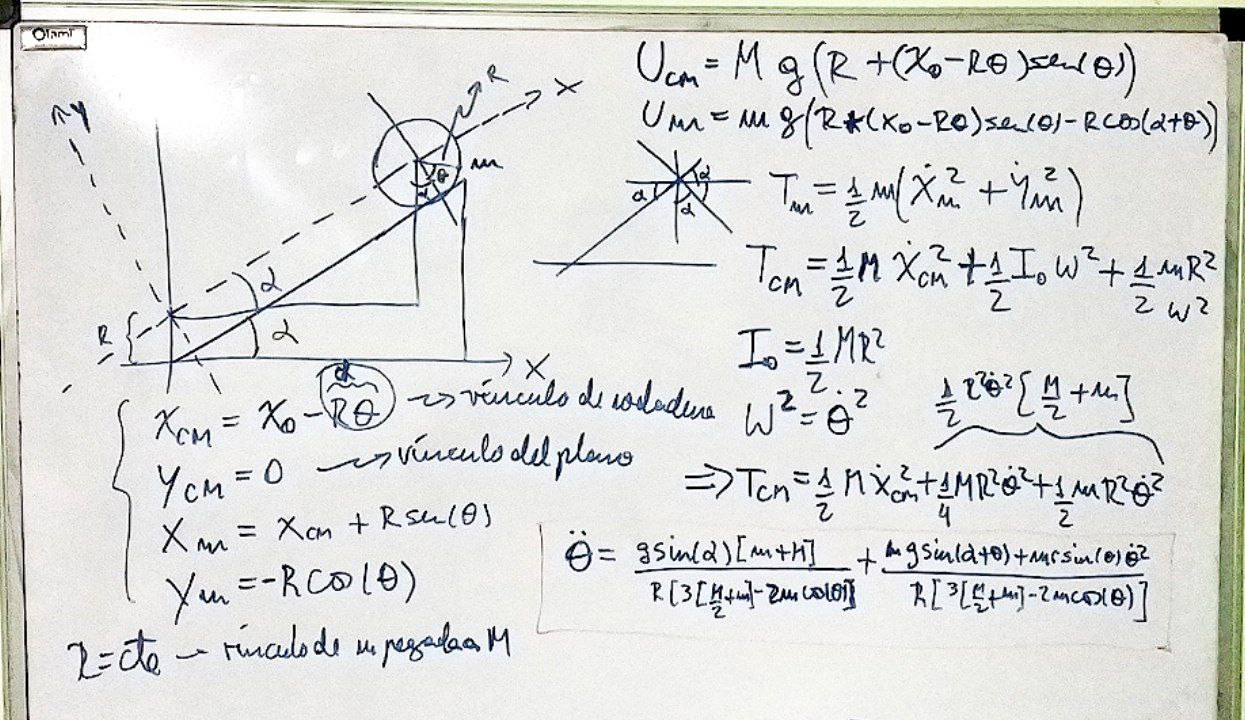Imagen de mi pizarrón cuando planteé esto. Spoiler alert: la solución del sistema está ahí también
<img src="photo_2022-04-21_00-41-12.jpg" width = 800 height = 400>

Voy a establecer mi sistema de coordenadas rotado. De paso cañazo me calculo las derivadas también.

In [4]:
xcm = x0 - r*th
xm = xcm + r*smp.sin(th)
ym = -r * smp.cos(th)
dxcmdt = smp.diff(xcm, t)
dxmdt = smp.diff(xm,t)
dymdt = smp.diff(ym,t)
dthdt = smp.diff(th,t)

# Energías y lagrangiano

Ahora voy a definir las funciones energía primero y luego el lagrangiano del sistema

In [5]:
m, M, g = smp.symbols(['m', 'M', 'g'])
Ucm = M*g*(r + xcm*smp.sin(al))
Um = m*g*(r + xcm*smp.sin(al) - r*smp.cos(al+th))
Tcm = smp.Rational(1,2)*(M*dxcmdt**2 + r**2 * th.diff(t)**2 * (M/2 + m))
Tm = smp.Rational(1,2)* m * (dxmdt**2 + dymdt**2)

In [6]:
L = Tcm + Tm - Ucm - Um
L.simplify()

-M*g*(r + (-r*\theta(t) + x0)*sin(\alpha)) + M*r**2*Derivative(\theta(t), t)**2/2 + g*m*(r*cos(\alpha + \theta(t)) - r + (r*\theta(t) - x0)*sin(\alpha)) + m*r**2*(1 - cos(\theta(t)))*Derivative(\theta(t), t)**2 + r**2*(M + 2*m)*Derivative(\theta(t), t)**2/4

# Ecuaciones de movimiento

Ahora vamos a calcular la ecuación de movimiento según E+L
$$
\frac{d}{dt}\left( \frac{\partial L}{\partial \dot{th}} \right) - \frac{\partial L}{\partial {th}} = 0
$$

In [7]:
LEth = smp.diff(smp.diff(L,dthdt),t) - smp.diff(L, th)
LEth.simplify()

r*(-2*M*g*sin(\alpha) + 3*M*r*Derivative(\theta(t), (t, 2)) - 2*g*m*sin(\alpha) + 2*g*m*sin(\alpha + \theta(t)) + 2*m*r*sin(\theta(t))*Derivative(\theta(t), t)**2 - 4*m*r*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 6*m*r*Derivative(\theta(t), (t, 2)))/2

In [8]:
sol = smp.solve([LEth], (th_tt))

In [9]:
sol[th_tt]

2*(M*g*sin(\alpha) + g*m*sin(\alpha) - g*m*sin(\alpha + \theta(t)) - m*r*sin(\theta(t))*Derivative(\theta(t), t)**2)/(r*(3*M - 4*m*cos(\theta(t)) + 6*m))

# Resolviendo el sistema de ecuaciones

In [10]:
dwdt_f = smp.lambdify((t,g,m,M,r,al,x0, th, th_t), sol[th_tt])
dthdt_f = smp.lambdify(th_t,th_t)

In [11]:
def dSdt(S,t,g,m,M,r,al,x0):
    th, w = S
    return [
        dthdt_f(w),
        dwdt_f(t,g,m,M,r,al,x0, th, w)
    ]

In [12]:
from scipy.integrate import odeint
import numpy as np

In [13]:
t_e = np.linspace(0,40,1001)
g_e = 9.81
m_e = 1
M_e = 10
r_e = 1
al_e = 2.5*np.pi/180
x0_e = 15
condinic = [0, np.pi]
ans = odeint(dSdt, y0= condinic, t=t_e, args=(g_e,m_e,M_e,r_e,al_e,x0_e))

In [14]:
theta = ans.T[0]

# Animando y ploteando

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

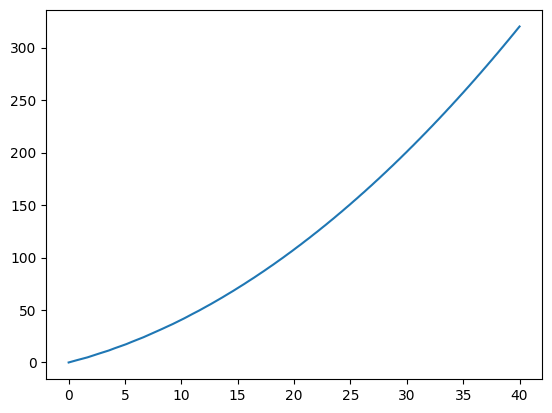

In [16]:
plt.plot(t_e, theta)
plt.show()

In [17]:
def get_xMyMxmym(t,theta, r_e, al_e, x0_e):
    return ((x0_e - r_e*theta) * np.cos(al_e),
           (x0_e - r_e*theta) * np.sin(al_e),
            (x0_e - r_e*theta) * np.cos(al_e) + r_e*np.sin(theta),
           (x0_e - r_e*theta) * np.sin(al_e) - r_e*np.cos(theta),
           )

xM, yM, xm, ym = get_xMyMxmym(t,theta, r_e, al_e, x0_e)

In [18]:
ym

array([ -0.34570919,  -0.34329114,  -0.32514701, ..., -13.39417953,
       -13.90921987, -14.25125388])

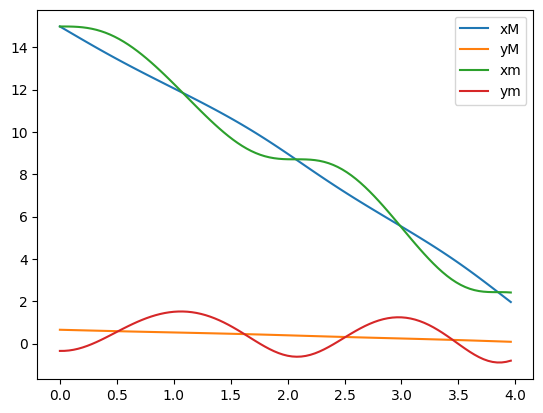

In [19]:
plt.plot(t_e[:100], xM[:100], label='xM')
plt.plot(t_e[:100], yM[:100], label='yM')
plt.plot(t_e[:100], xm[:100], label='xm')
plt.plot(t_e[:100], ym[:100], label='ym')
plt.legend()
plt.show()

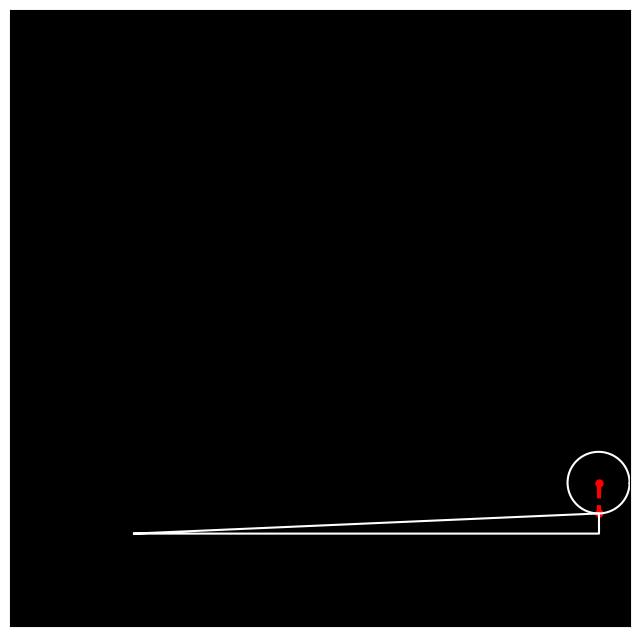

In [20]:
#from matplotlib.patches import Circle
#circle = Circle((xM[0], yM[0]), radius = r_e, facecolor='none', edgecolor='green', linewidth=2)
angulos = np.arange(0,2*np.pi, 0.05)
def animate(i):
    ln1.set_data([xM[i], xm[i]], [yM[i], ym[i]])
    ln2.set_data([np.cos(angulos) + xM[i]], [np.sin(angulos) + yM[i]])
    return ln1, ln2 

# Creo la figura y sus ejes. Ajusto algunas cositas de los ejes.
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # Esto es para esconder los ticks del eje x
ax.get_yaxis().set_ticks([])    # Esto es para esconder los ticks del eje y
ax.set_ylim(-4,16)
ax.set_xlim(-4,16)

# Le digo a python qué quiero que me muestre en la figura.
ln1, = plt.plot([xM[0], xm[0]], [yM[0], ym[0]], 'r--o', lw = 3, markersize = 5)
ln2, = plt.plot(np.cos(angulos) + xM[0], np.sin(angulos) + yM[0], 'w-')
ln3, = plt.plot([0, 15, 15, 0],[-r_e, -r_e, np.tan(al_e)*15-r_e , -r_e], 'w-')
#plt.plot(np.linspace(0,15,500), np.tan(al_e)*np.linspace(0,15,500)-r_e, 'w-')

#ax.add_patch(circle_pos)

ani = animation.FuncAnimation(fig, animate, frames = 500, interval = 50)
plt.show()
#ani.save('Disco-masa.gif', writer = 'pillow', fps = 25)

# Pequeñas oscilaciones

Ya vimos que la cosa puede oscilar. Eso queda determinado por el peralte del plano y la función potencial del sistema. O sea, si el plano es una pared apenitas inclinada, el disco va a rodar seguro. Además si la función potencial no tiene un mínimo la cosa no va a poder oscilar, ya que si la fuerza es proporcional al gradiente del potencial, cuando me encuentro en un mínimo es el único caso en el que la cosa puede volver al mismo lugar es cuando el gradiente "me cambia de signo" cuando me alejo de dicho punto.

Entonces vamos a graficar $V(\alpha, \theta)$. La gracia de hacerlo así es que si encuentro que la cosa tiene un mínimo en algún lado, averiguo de una $\alpha$ y los valores de $\theta$ para los que se cumple. Al final de cuentas a mí me va a interesar $V(\theta)$ para cada $\alpha$ para encontrar el $\theta_0$ para el que se minimiza el potencial.

In [21]:
U = M_e*g_e*(r_e + (x0_e - r_e*th)*smp.sin(al)) + m_e*g_e*(r_e + (x0_e - r_e*th)*smp.sin(al) - r_e*smp.cos(th))
U_f = smp.lambdify((al, th), U)

In [22]:
al_array = np.linspace(0, np.pi/20, 50)
theta_array = np.linspace(0, 2*np.pi, 50)

In [23]:
alphav, thetav = np.meshgrid(al_array, theta_array)
Uv = U_f(alphav, thetav)

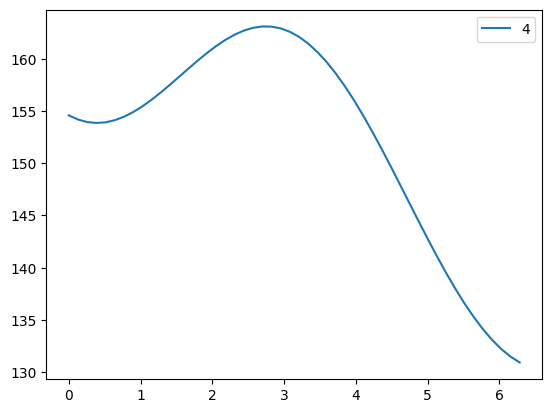

In [24]:
plt.plot(theta_array, U_f(2.*np.pi/180, theta_array), label= '4')
#plt.plot(al_array, U_f(al_array, 2))
plt.legend()
plt.show()

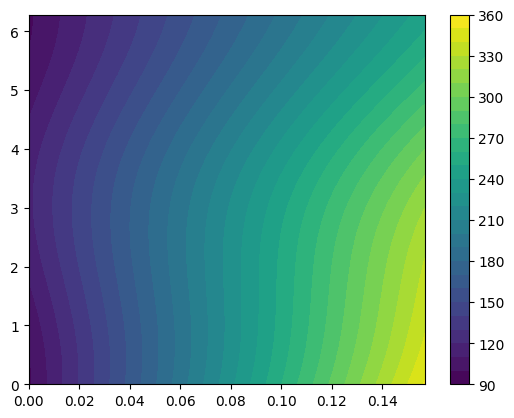

In [48]:
from matplotlib import cm
plt.contourf(alphav, thetav, Uv, levels=30)
plt.colorbar(cmap = cm.coolwarm)
plt.show()

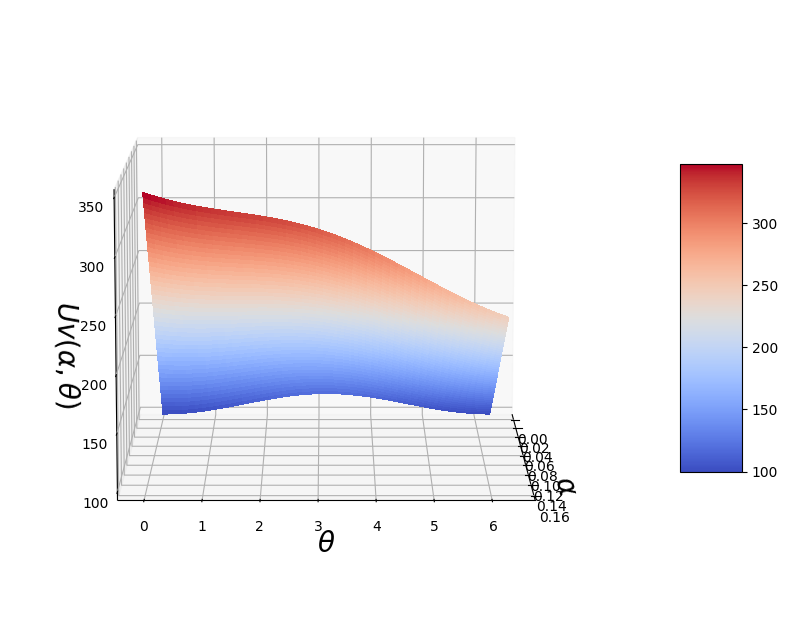

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize = (14,8))
ax = plt.axes(projection='3d')

# Plot the surface.
surf = ax.plot_surface(alphav, thetav, Uv, cmap=cm.coolwarm,linewidth=0, antialiased =False)

ax.set_xlabel(r'$\alpha$', fontsize= 20)
ax.set_ylabel(r'$\theta$', fontsize= 20)
ax.set_zlabel(r'$Uv(\alpha,\theta)$', fontsize= 20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=10, azim=0)
def animate_3d(i):
    ax.view_init(elev=10, azim=3*i)

ani = animation.FuncAnimation(fig, animate_3d, frames = 120, interval =50)
plt.show()
ani.save('Potencial3D.gif', writer='pillow', fps=15)